In [ ]:
import pandas as pd
import json

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [1]:
df=pd.read_csv('data.csv')
df

NameError: name 'pd' is not defined

**Parsing kolom Content (JSON string) menjadi kolom baru**

In [36]:
content_parsed = df['Content'].apply(json.loads).apply(pd.Series)

**Gabungkan dengan kolom aslinya (hanya kolom penting)**

In [37]:
df_cleaned = pd.concat([df, content_parsed[['ph', 'temperature', 'tds']]], axis=1)

**Ubah kolom ke float**

In [38]:
df_cleaned['ph'] = df_cleaned['ph'].astype(float)
df_cleaned['temperature'] = df_cleaned['temperature'].astype(float)
df_cleaned['tds'] = df_cleaned['tds'].astype(float)

In [39]:
df_cleaned[['ph', 'temperature', 'tds']]

,ph,temperature,tds
0,6.5,29.12,0.0
1,6.5,29.12,0.0
2,6.5,29.12,0.0
3,6.5,29.12,0.0
4,6.5,29.12,0.0
...,...,...,...
28823,7.5,22.06,189.0
28824,7.5,22.06,188.0
28825,7.5,22.06,187.0
28826,7.5,22.06,184.0


**Ambil hanya fitur yang dibutuhkan**

In [40]:
X = df_cleaned[['ph', 'temperature', 'tds']]

**Normalisasi data**

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Clustering KMeans (3 klaster)**

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

**hasil clustering**

In [43]:
df_cleaned[['ph', 'temperature', 'tds', 'cluster']]

,ph,temperature,tds,cluster
0,6.5,29.12,0.0,1
1,6.5,29.12,0.0,1
2,6.5,29.12,0.0,1
3,6.5,29.12,0.0,1
4,6.5,29.12,0.0,1
...,...,...,...,...
28823,7.5,22.06,189.0,0
28824,7.5,22.06,188.0,0
28825,7.5,22.06,187.0,0
28826,7.5,22.06,184.0,0


**Plot suhu vs pH, diberi warna berdasarkan cluster**

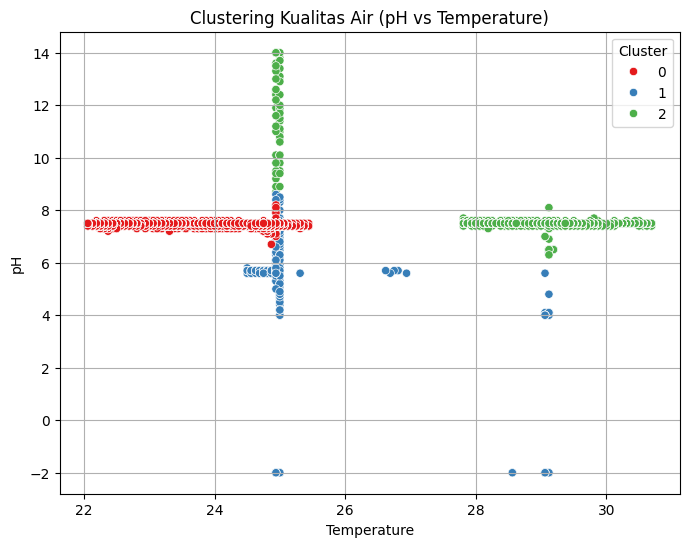

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cleaned,
    x='temperature',
    y='ph',
    hue='cluster',
    palette='Set1'
)
plt.title('Clustering Kualitas Air (pH vs Temperature)')
plt.xlabel('Temperature')
plt.ylabel('pH')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Mapping Cluster ke Label Kualitas**

In [45]:
cluster_means = df_cleaned.groupby('cluster')[['ph', 'temperature', 'tds']].mean()
cluster_means

,ph,temperature,tds
cluster,,,
0,7.469487,23.480647,211.534864
1,4.938086,25.317355,8.500938
2,7.527051,28.711650,207.723063


**Mapping manual cluster ke kualitas**

In [46]:
label_map = {
    2: 'Baik',
    1: 'Cukup',
    0: 'Buruk'
}

df_cleaned['kualitas_air'] = df_cleaned['cluster'].map(label_map)
df_cleaned[['ph', 'temperature', 'tds', 'cluster', 'kualitas_air']]

,ph,temperature,tds,cluster,kualitas_air
0,6.5,29.12,0.0,1,Cukup
1,6.5,29.12,0.0,1,Cukup
2,6.5,29.12,0.0,1,Cukup
3,6.5,29.12,0.0,1,Cukup
4,6.5,29.12,0.0,1,Cukup
...,...,...,...,...,...
28823,7.5,22.06,189.0,0,Buruk
28824,7.5,22.06,188.0,0,Buruk
28825,7.5,22.06,187.0,0,Buruk
28826,7.5,22.06,184.0,0,Buruk


**Fungsi Prediksi Input Baru**

In [47]:
def prediksi_kualitas_air(suhu, ph, tds):
    # Buat data user jadi array dan normalisasi seperti data training
    input_data = pd.DataFrame([[ph, suhu, tds]], columns=['ph', 'temperature', 'tds'])
    input_scaled = scaler.transform(input_data)

    # Prediksi cluster
    cluster_pred = kmeans.predict(input_scaled)[0]

    # Mapping ke label kualitas air
    kualitas = label_map[cluster_pred]

    return kualitas

In [48]:
import joblib

# Simpan model dan scaler
joblib.dump(kmeans, 'model_kmeans.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_map, 'label_map.pkl')

['label_map.pkl']

In [49]:
suhu_user = 22
ph_user = 7.5
tds_user = 187

hasil = prediksi_kualitas_air(suhu_user, ph_user, tds_user)
print(f"Kualitas air berdasarkan input: {hasil}")

Kualitas air berdasarkan input: Buruk
